In [87]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [88]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [89]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [90]:
# plotting features of iris's to view linear seperability

def plot_features(feature_1, feature_2, iris_1, iris_2, iris_1_arr, iris_2_arr):
    ax1 = iris_1_arr.plot.scatter(x=feature_1,
                              y=feature_2,
                              c='DarkBlue', label=iris_1)
    
    ax2 = iris_2_arr.plot.scatter(x=feature_1,
                              y=feature_2,
                              c='Orange', label=iris_2,
                              ax=ax1)
    ax1.set_xlabel(feature_1)
    ax1.set_ylabel(feature_2)
    ax1.set_title('Scatter Plot of ' + iris_1 +' and ' + iris_2)
    ax1.legend()
    plt.show()

In [91]:
# seperate X and y into test and train

def test_and_train(X, y):
    combined = list(zip(X, y))
    # shuffle the combined list
    random.shuffle(combined)
    # unzip back into two lists
    X_shuffled, y_shuffled = zip(*combined)
    X_shuffled = np.array(X_shuffled)
    y_shuffled = np.array(y_shuffled)
    split_size = int(0.8 * len(X))
    # split the data into training and test sets
    X_train = X_shuffled[:split_size]
    y_train = y_shuffled[:split_size]
    X_test = X_shuffled[split_size:]
    y_test = y_shuffled[split_size:]
    return (X_train, X_test, y_train, y_test)

In [92]:
# plot results of perceptron

def plot_ppn_results(ppn):
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    plt.show()

In [93]:
# plotting decision regions function

def plot_decision_regions(X, y, classifier, x_label, y_label, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper left')
    plt.show()

In [94]:
# getting accuracy of model

def accuracy(y_pred, y_test, model_name, dict):
    n = y_test.shape[0]
    accuracy = (y_test == y_pred).sum() / n
    dict[model_name] = accuracy

In [95]:
# plot results of adaline

def plot_ada_results(ada1):
    plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-squared-error')
    plt.show()

In [96]:
# find optimal learning rate

def optimal_learning_rate(learning_rates, iter, X, y):
    for eta in learning_rates:
        ada1 = AdalineGD(n_iter=iter, eta=eta).fit(X, y)
        
        # Plot the cost over epochs
        plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
    
        plt.xlabel('Epochs')
        plt.ylabel('Sum-squared-error')
        plt.title('Adaline - Learning rate ' + str(eta))
        plt.show()

In [97]:
# find optimal number of iterations

def optimal_num_iters(n_iter, learning_rate, X, y):
    for iter in n_iter:
        ada1 = AdalineGD(n_iter=iter, eta=learning_rate).fit(X, y)
        
        # Plot the cost over epochs
        plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
    
        plt.xlabel('Epochs')
        plt.ylabel('Sum-squared-error')
        plt.title('Adaline - # iters = ' + str(iter))
        plt.show()

In [98]:
# standardize X

def standardize_data(X):
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    return X_std

In [99]:
# create array to hold all accuracies of models
dict = {}

In [100]:
# read in iris dataset
    # iris types:
        # setosa
        # versicolor
        # virginica
    # features
        # sepal length
        # sepal width
        # petal length
        # petal width

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


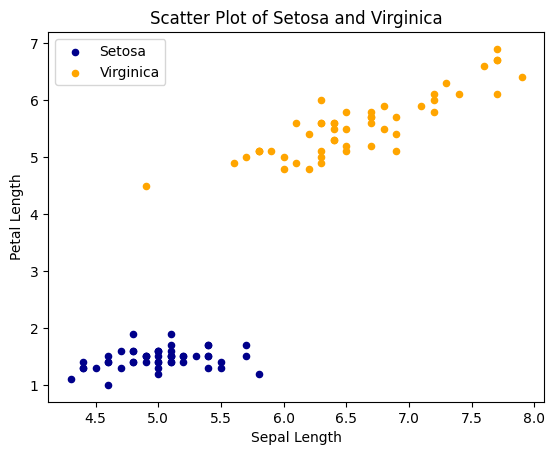

In [101]:
# pick 2 species of iris & 2 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # petal length [2]
iris_1 = df.loc[df[4]=='Iris-setosa']
X_1 = (iris_1[[0, 2]]).rename(columns={0: 'Sepal Length', 2: 'Petal Length'})
y_1 = np.where(iris_1[4] == 'Iris-setosa', 1, -1)
iris_2 = df.loc[df[4]=='Iris-virginica']
X_2 = (iris_2[[0, 2]]).rename(columns={0: 'Sepal Length', 2: 'Petal Length'})
y_2 = np.where(iris_2[4] == 'Iris-setosa', 1, -1)

# plot features to show they are linearly separable
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

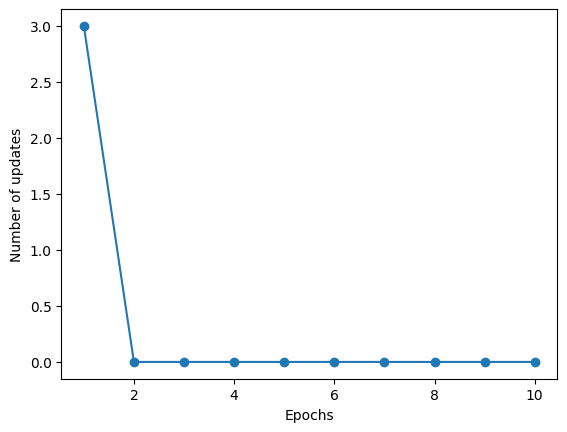

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_29838/2013398469.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


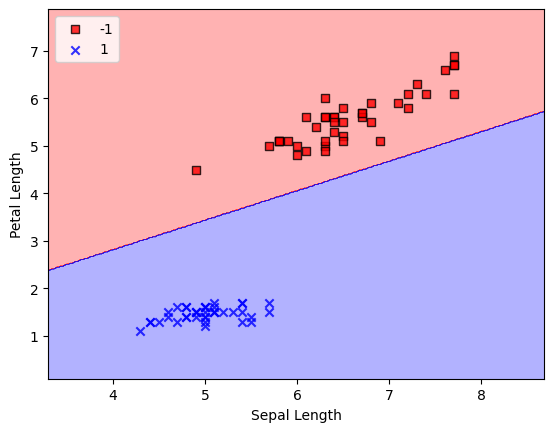

In [102]:
# create and train Perceptron
ppn1 = Perceptron(eta=0.1, n_iter=10)
ppn1.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn1)
plot_decision_regions(X_train, y_train, ppn1, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn1.predict(X_test)
accuracy(y_pred, y_test, "ppn1", dict)

In [103]:
# standardize data
    # scaling features improves gradient descent
    # Adaline uses gradient descent to find the weights which minimize the cost function

X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X_std, y)

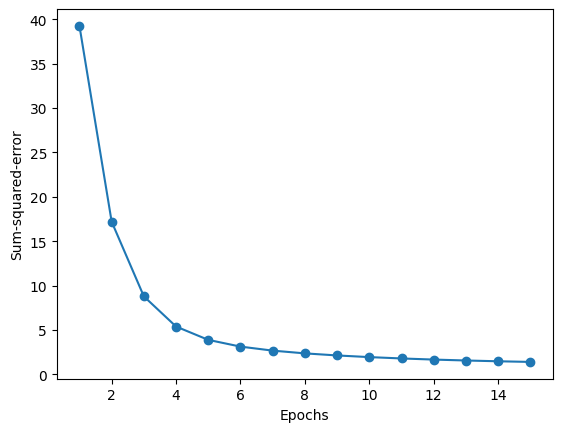

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_29838/2013398469.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


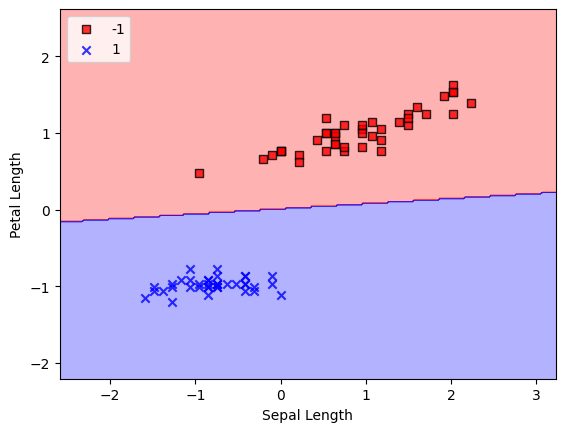

In [104]:
# create and train Adaline
ada1 = AdalineGD(n_iter=15, eta=0.01).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada1)
plot_decision_regions(X_std_train, y_std_train, ada1, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada1.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada1", dict)

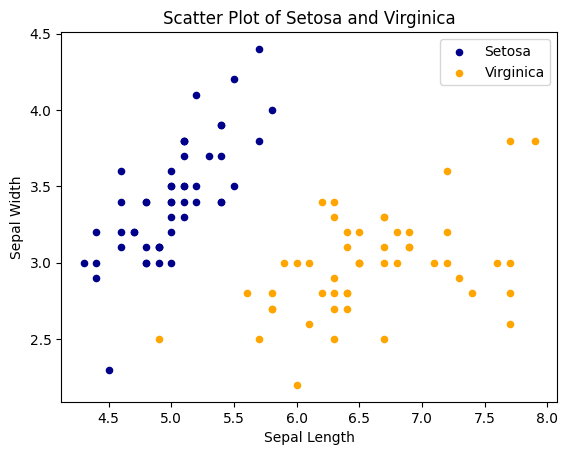

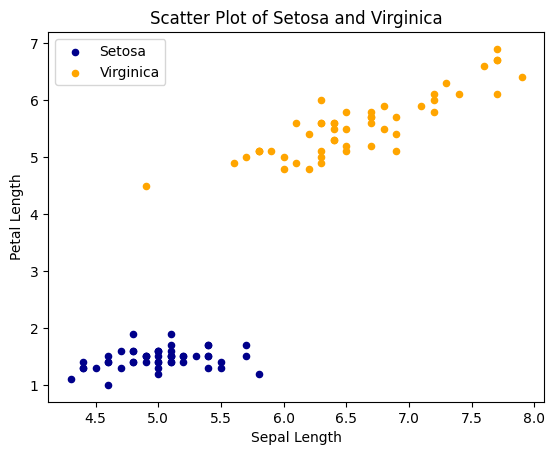

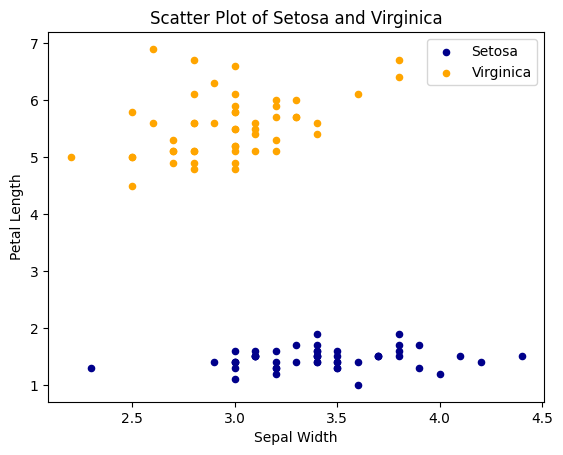

In [105]:
# pick 2 species of iris & 3 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
setosa = df.loc[df[4]=='Iris-setosa']
X_1 = (setosa[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(setosa[4] == 'Iris-setosa', 1, -1)
virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-setosa', 1, -1)

# plot features to show they are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

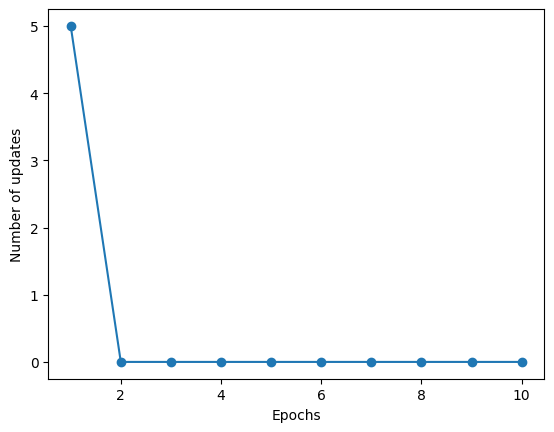

In [106]:
# create and train Perceptron
ppn2 = Perceptron(eta=0.1, n_iter=10)
ppn2.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn2)
# plot_decision_regions(X_train, y_train, ppn1, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn2.predict(X_test)
accuracy(y_pred, y_test, "ppn2", dict)

In [107]:
# standardize data
X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X, y)

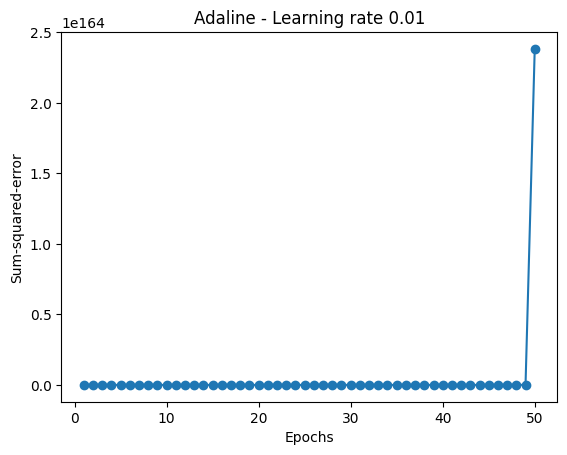

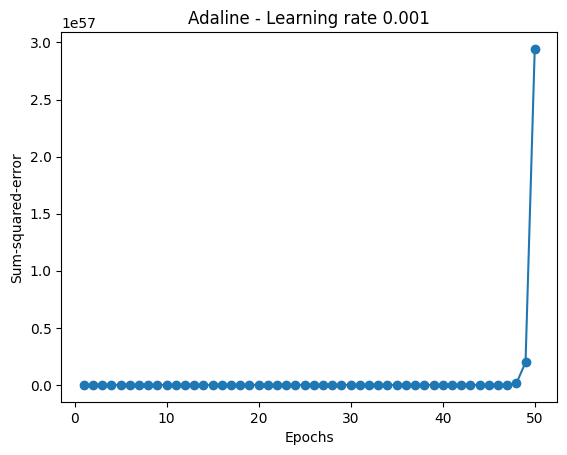

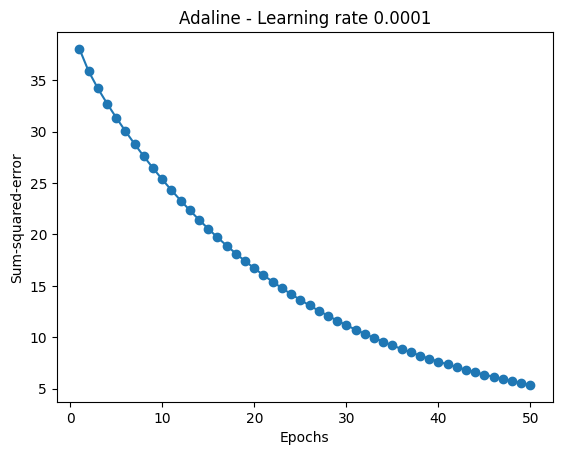

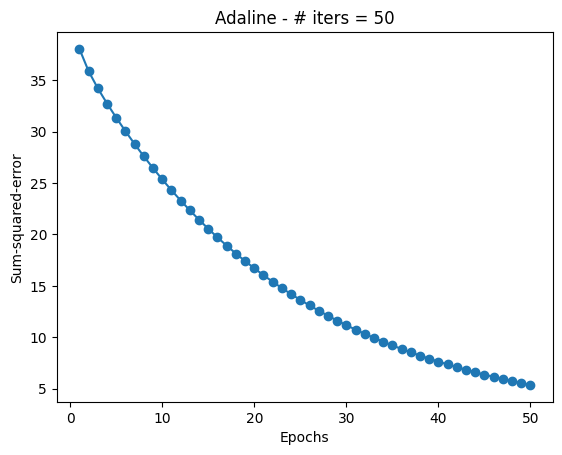

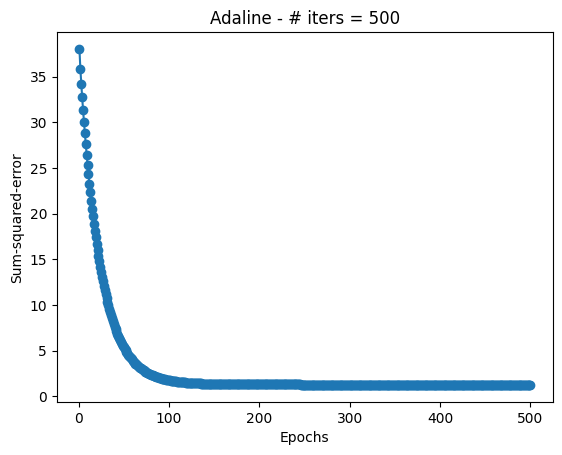

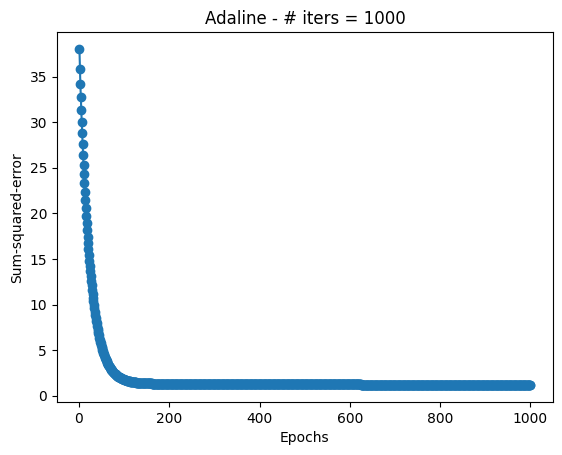

In [108]:
# find a good learning rate for Adaline
learning_rates = [0.01, 0.001, 0.0001]
optimal_learning_rate(learning_rates, 50, X_std_train, y_std_train)

# find a good number of iterations for Adaline
n_iter = [50, 500, 1000]
optimal_num_iters(n_iter, .0001, X_std_train, y_std_train)

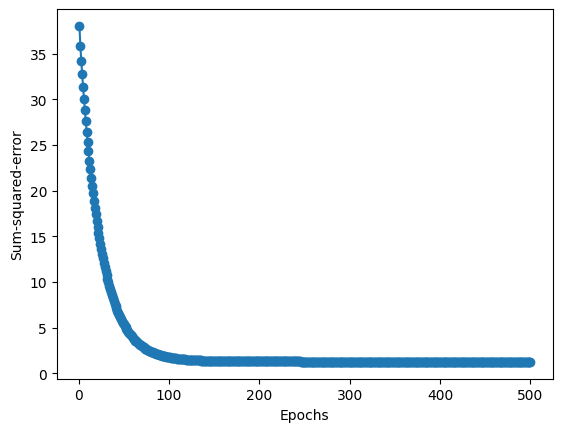

In [109]:
# create and train Adaline
ada2 = AdalineGD(n_iter=500, eta=0.0001).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada2)
# plot_decision_regions(X_std_train, y_train, ada2, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada2.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada2", dict)

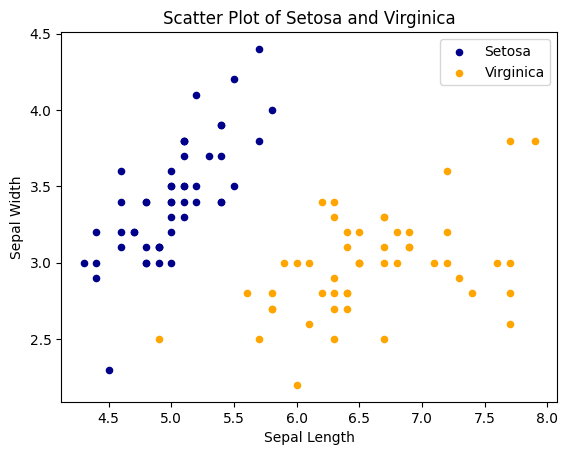

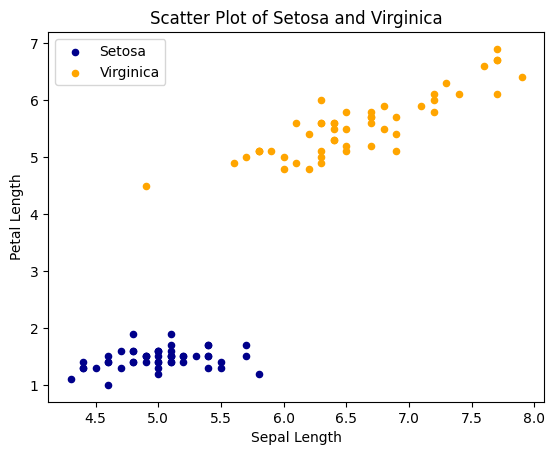

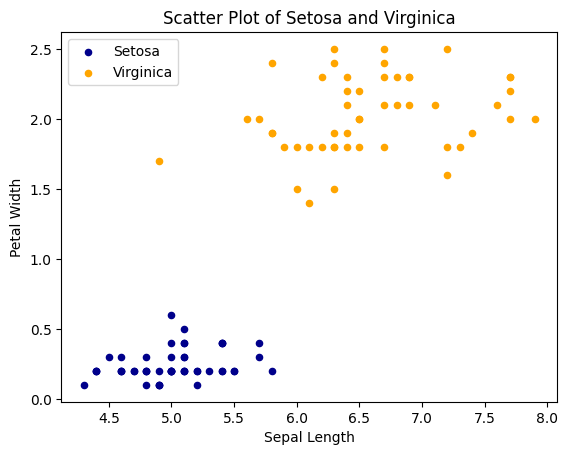

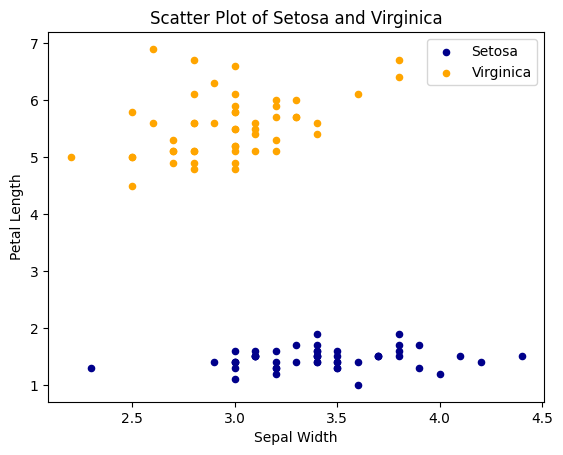

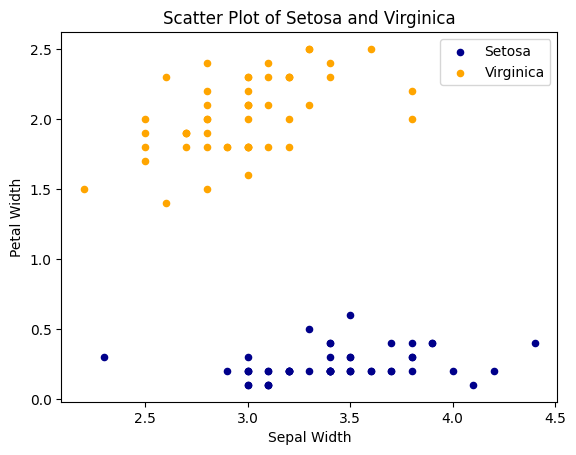

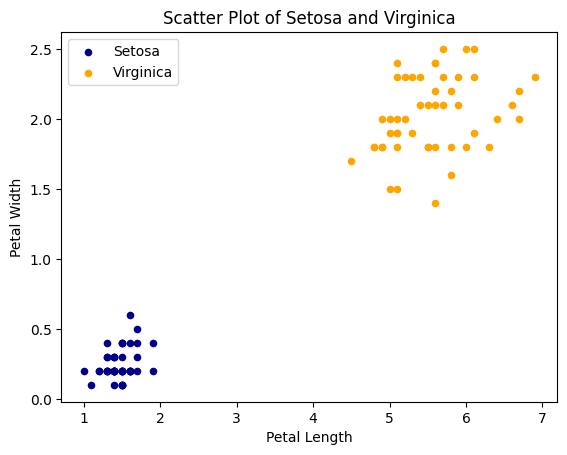

In [110]:
# pick 2 species of iris & 4 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
    # petal width [4]
setosa = df.loc[df[4]=='Iris-setosa']
X_1 = (setosa[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_1 = np.where(setosa[4] == 'Iris-setosa', 1, -1)
virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_2 = np.where(virginica[4] == 'Iris-setosa', 1, -1)

# plot features to show they are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Petal Length', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

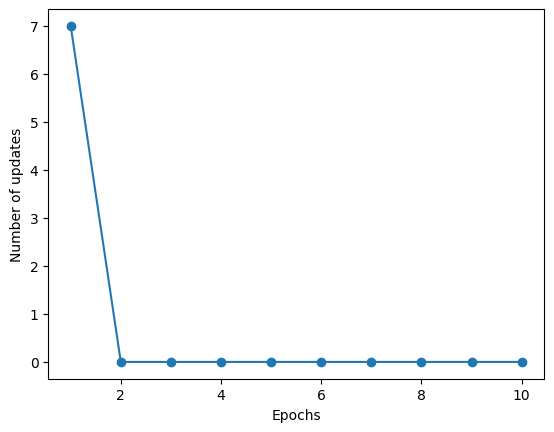

In [111]:
# create and train Perceptron
ppn3 = Perceptron(eta=0.1, n_iter=10)
ppn3.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn3)
# plot_decision_regions(X_train, y_train, ppn3, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn3.predict(X_test)
accuracy(y_pred, y_test, "ppn3", dict)

In [112]:
# standardize data
X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X_std, y)

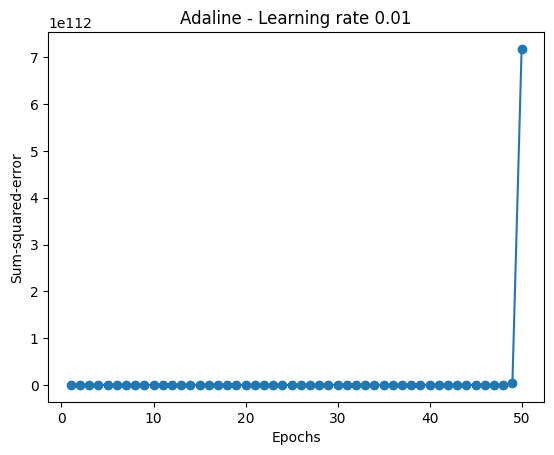

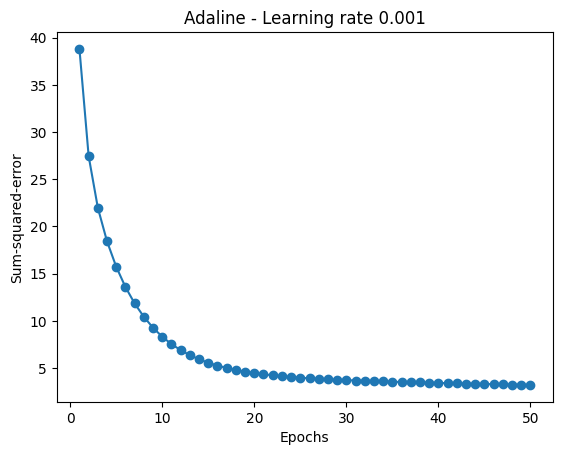

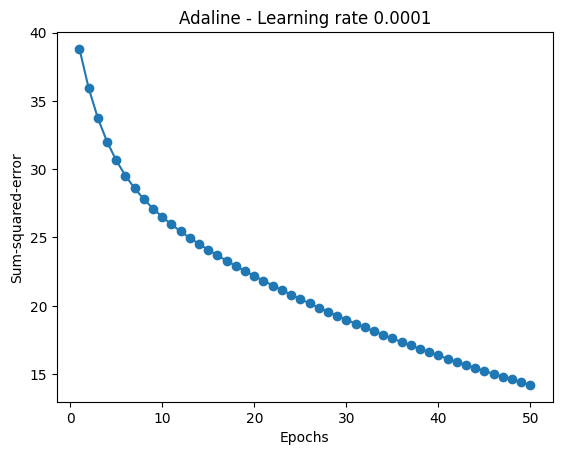

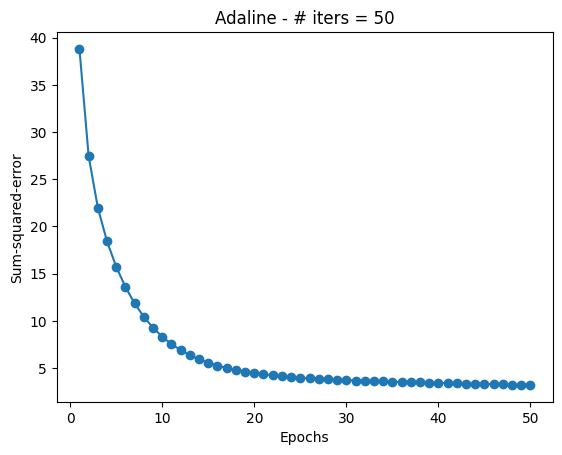

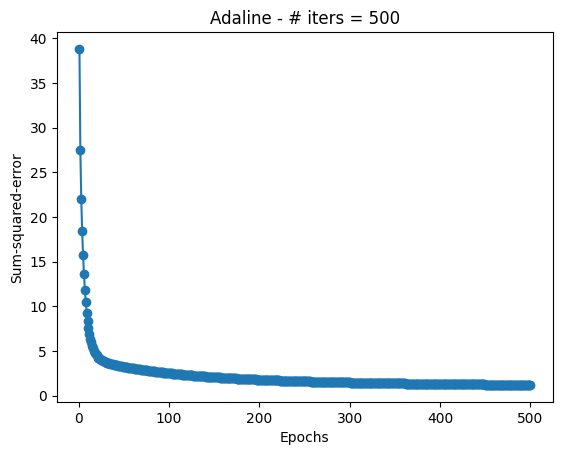

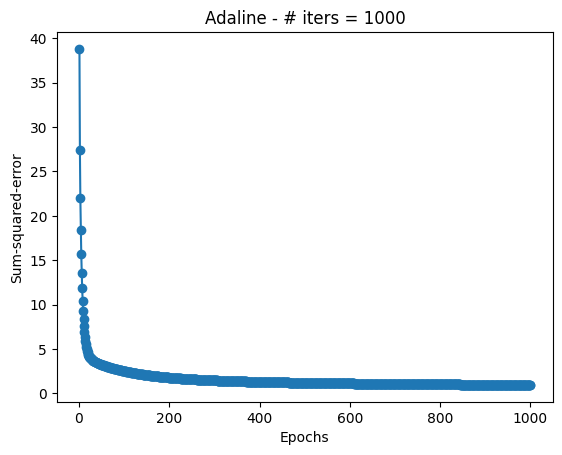

In [113]:
# find a good learning rate
learning_rates = [0.01, 0.001, 0.0001]
optimal_learning_rate(learning_rates, 50, X_std_train, y_std_train)

# find a good number of iterations
n_iter = [50, 500, 1000]
optimal_num_iters(n_iter, .001, X_std_train, y_std_train)

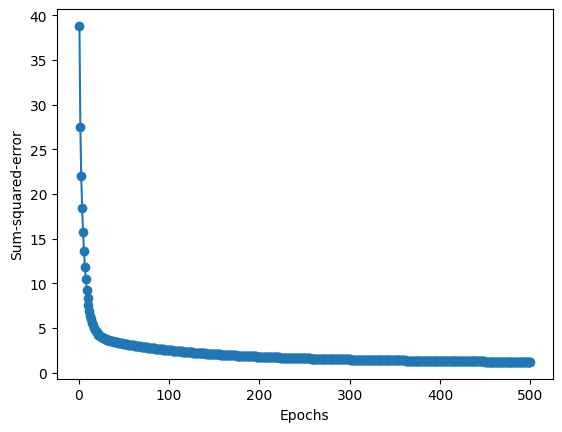

In [114]:
# create and train Adaline

ada3 = AdalineGD(n_iter=500, eta=0.001).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada3)
# plot_decision_regions(X_std_train, y_train, ada3, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada3.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada3", dict)

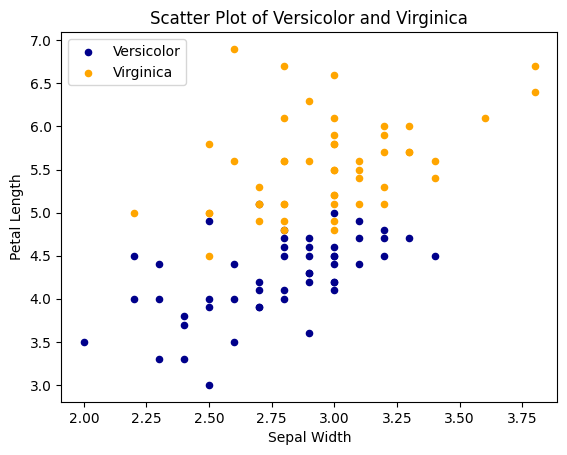

In [115]:
# pick 2 species of iris & 2 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal width [1]
    # petal length [2]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[1, 2]]).rename(columns={1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)
virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[1, 2]]).rename(columns={1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

# plot features to show they aren't linearly separable
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

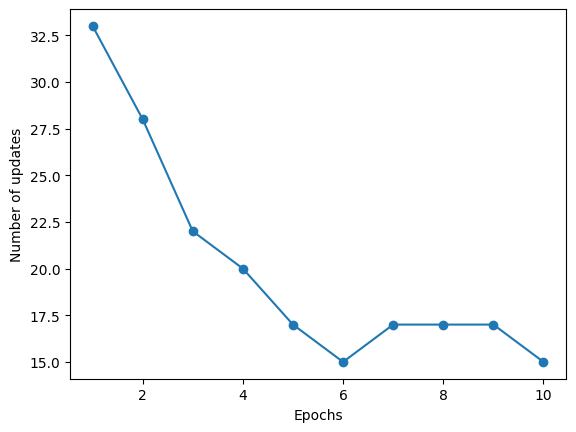

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_29838/2013398469.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


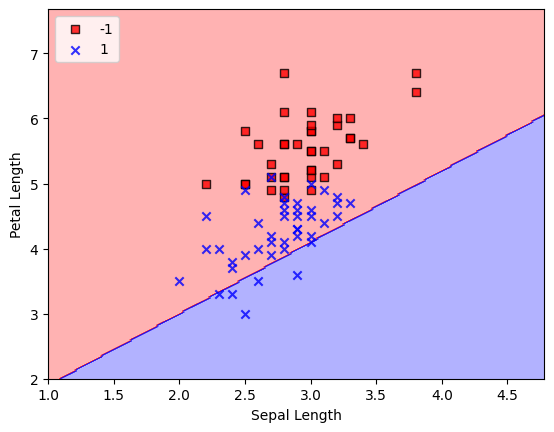

In [116]:
# create and train Perceptron
ppn4 = Perceptron(eta=0.1, n_iter=10)
ppn4.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn4)
plot_decision_regions(X_train, y_train, ppn4, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn4.predict(X_test)
accuracy(y_pred, y_test, "ppn4", dict)

In [117]:
# standardize data
X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X_std, y)

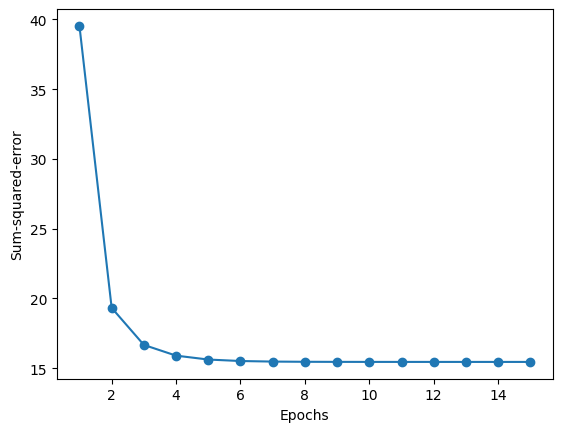

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_29838/2013398469.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


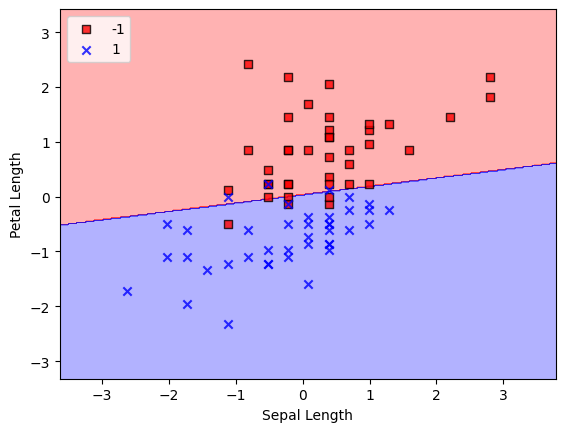

In [118]:
# create and train Adaline
ada4 = AdalineGD(n_iter=15, eta=0.01).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada4)
plot_decision_regions(X_std_train, y_std_train, ada4, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada4.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada4", dict)

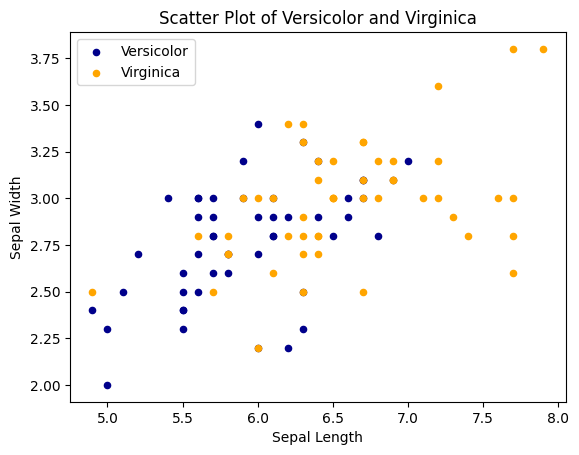

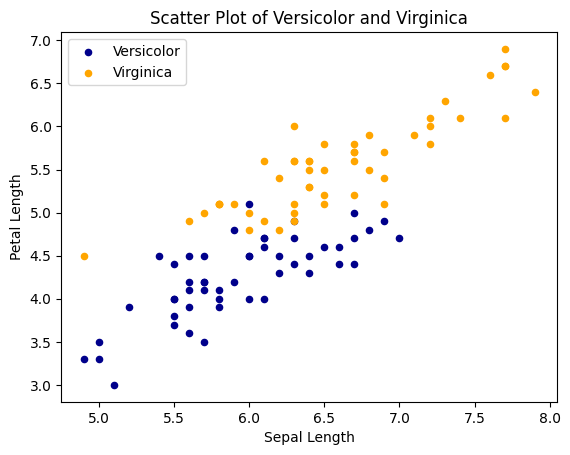

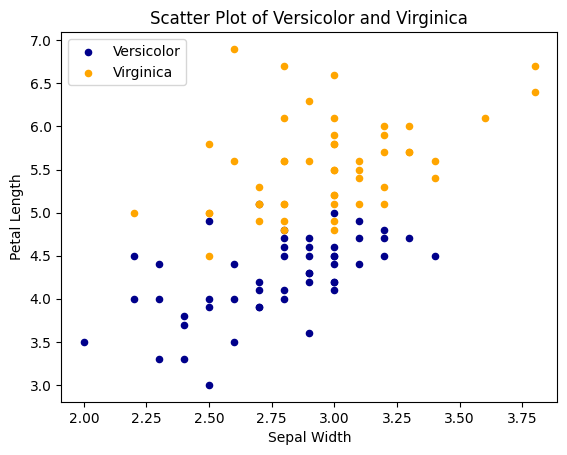

In [119]:
# pick 2 species of iris & 3 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)
virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

# plot features to show they aren't linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

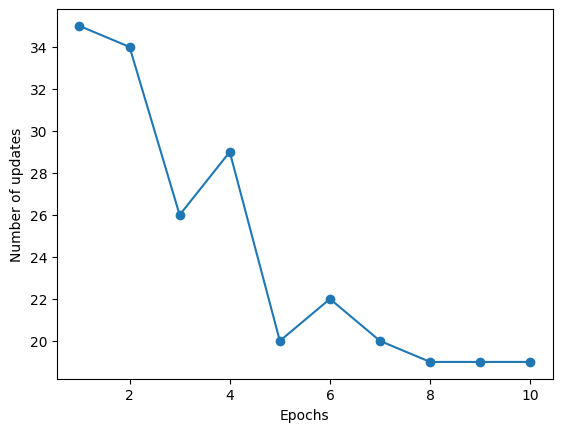

In [120]:
# create and train Perceptron
ppn5 = Perceptron(eta=0.1, n_iter=10)
ppn5.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn5)
# plot_decision_regions(X_train, y_train, ppn1, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn5.predict(X_test)
accuracy(y_pred, y_test, "ppn5", dict)

In [121]:
# standardize data
X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X, y)

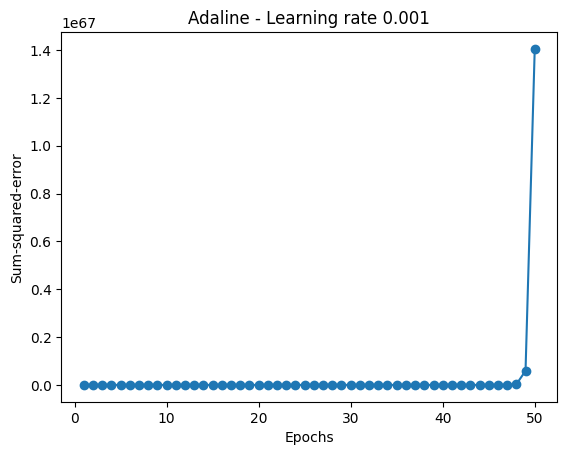

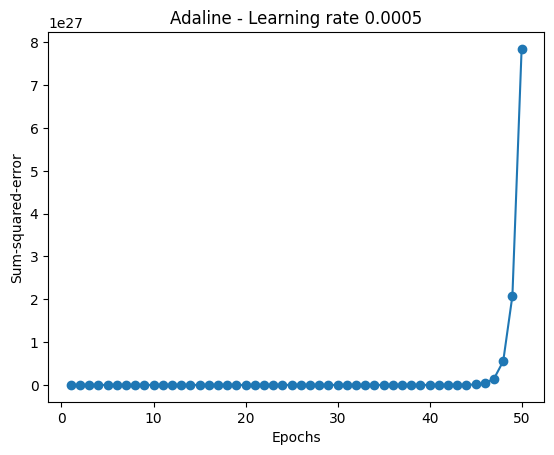

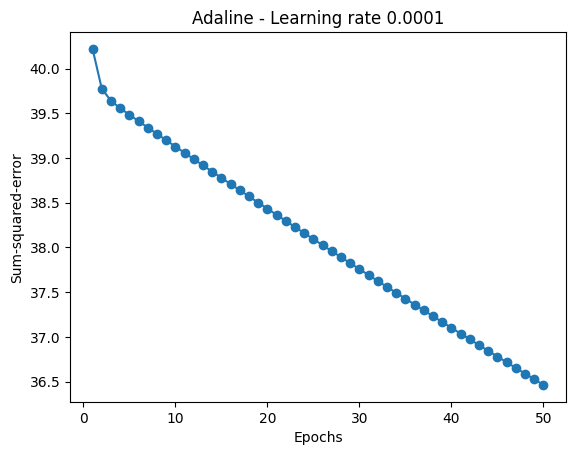

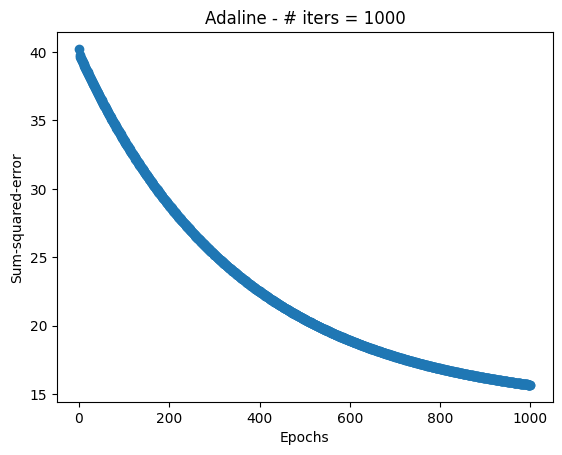

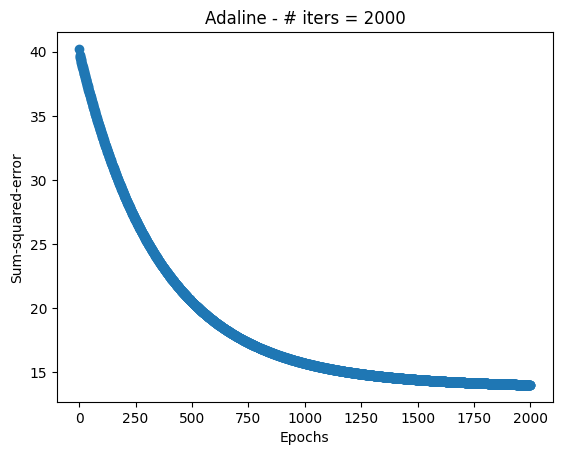

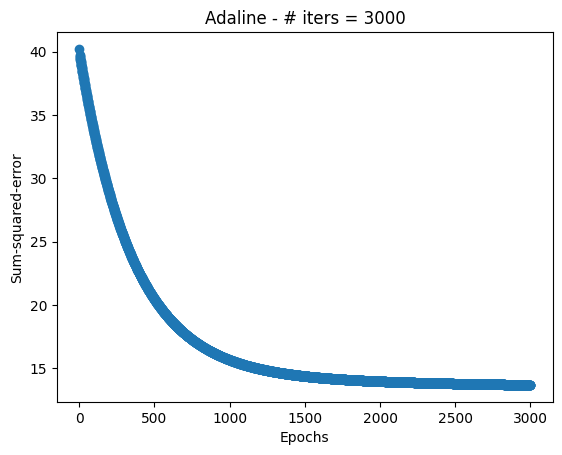

In [122]:
# find a good learning rate
learning_rates = [0.001, 0.0005, 0.0001]
optimal_learning_rate(learning_rates, 50, X_std_train, y_std_train)

# find a good number of iterations
n_iter = [1000, 2000, 3000]
optimal_num_iters(n_iter, .0001, X_std_train, y_std_train)

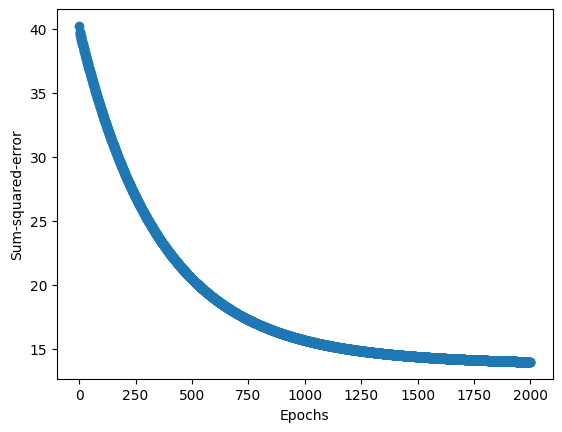

In [123]:
# create and train Adaline, plot results
ada5 = AdalineGD(n_iter=2000, eta=0.0001).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada5)
# plot_decision_regions(X_std_train, y_train, ada2, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada5.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada5", dict)

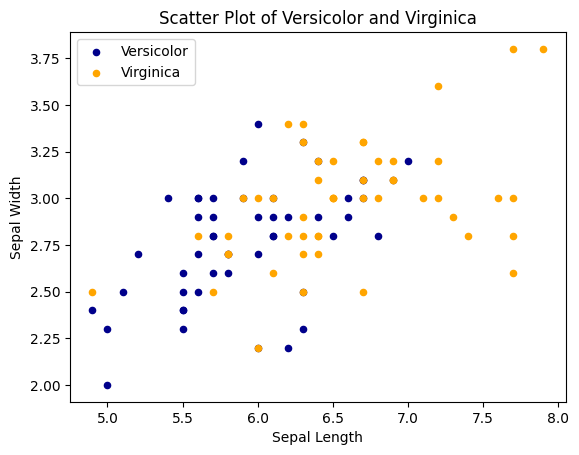

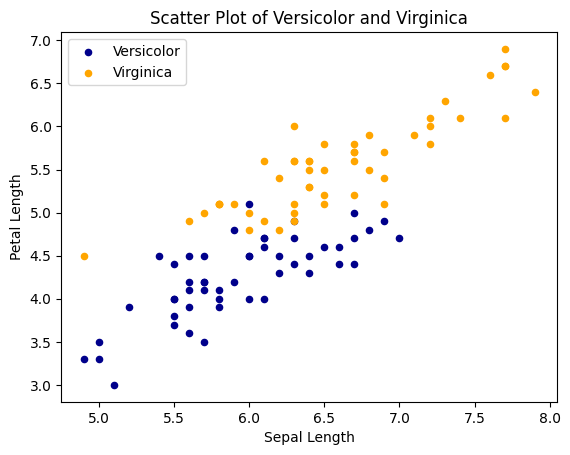

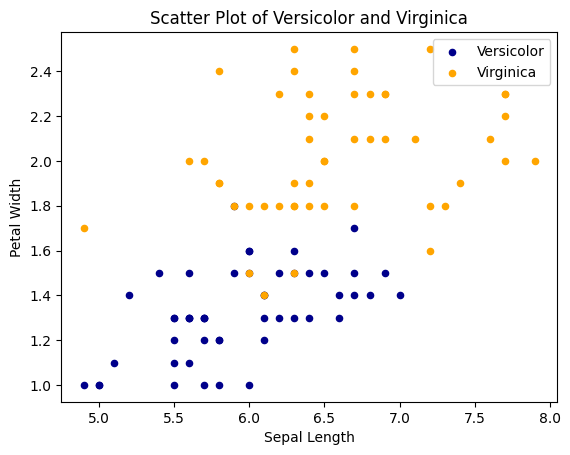

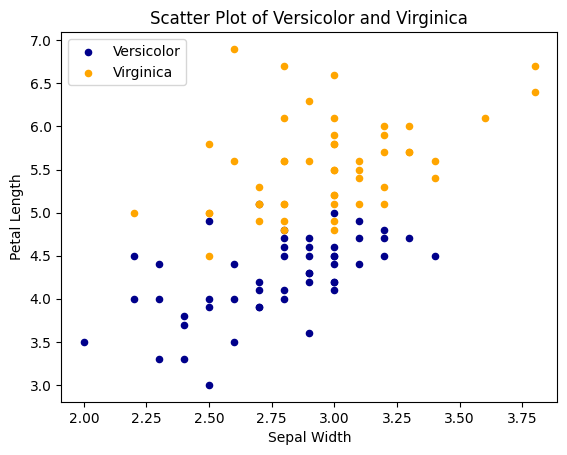

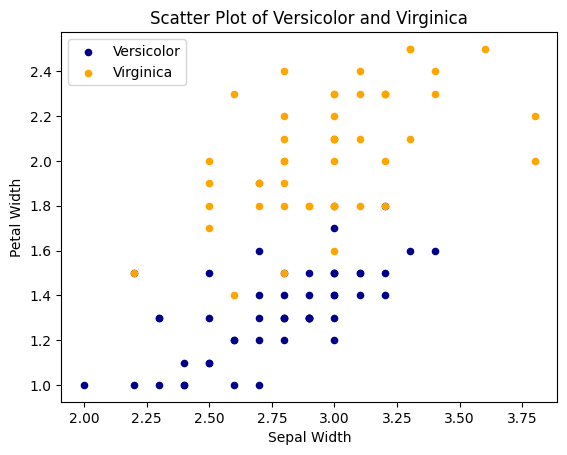

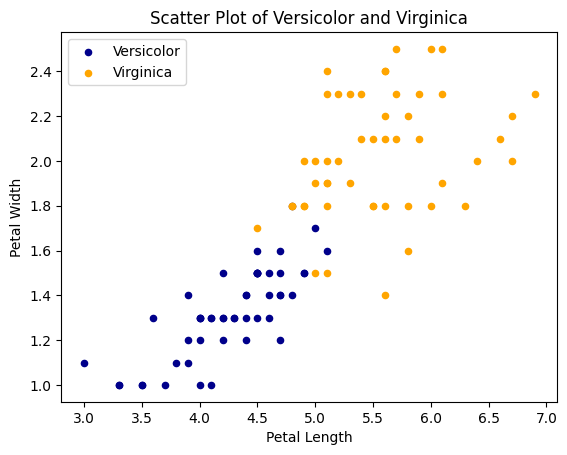

In [124]:
# pick 2 species of iris & 4 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
    # petal width [4]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)
virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

# plot features to show they aren't linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Petal Length', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)

# create train and test data
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)
X_train, X_test, y_train, y_test = test_and_train(X, y)

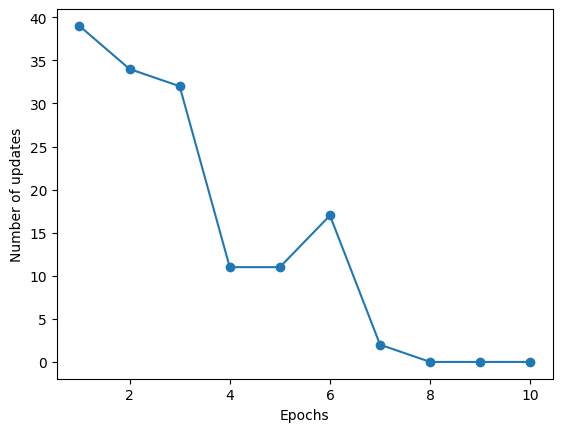

In [125]:
# create and train Perceptron
ppn6 = Perceptron(eta=0.1, n_iter=10)
ppn6.fit(X_train, y_train)

# plot results
plot_ppn_results(ppn6)
# plot_decision_regions(X_train, y_train, ppn3, 'Sepal Length', 'Petal Length')

# calculate accuracy of ppn1 and add to dictionary
y_pred = ppn6.predict(X_test)
accuracy(y_pred, y_test, "ppn6", dict)

In [126]:
# standardize data
X_std = standardize_data(X)

# create train and test data
X_std_train, X_std_test, y_std_train, y_std_test = test_and_train(X_std, y)

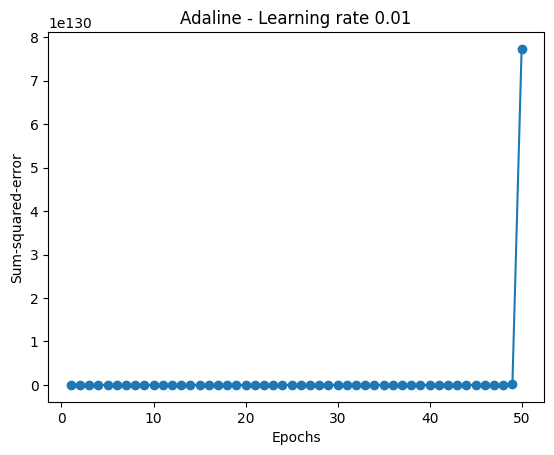

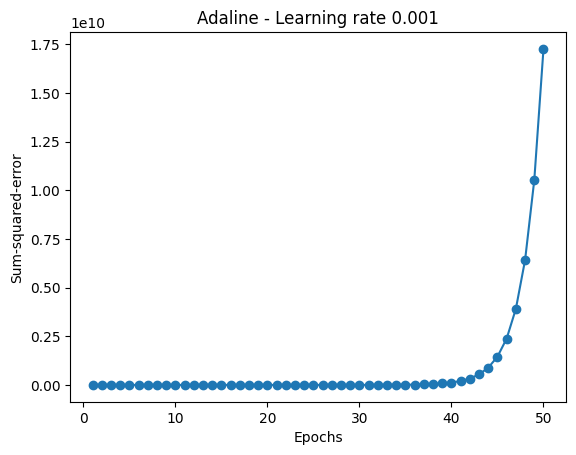

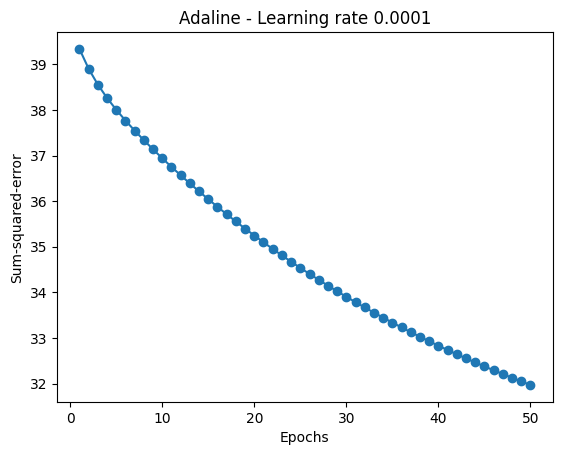

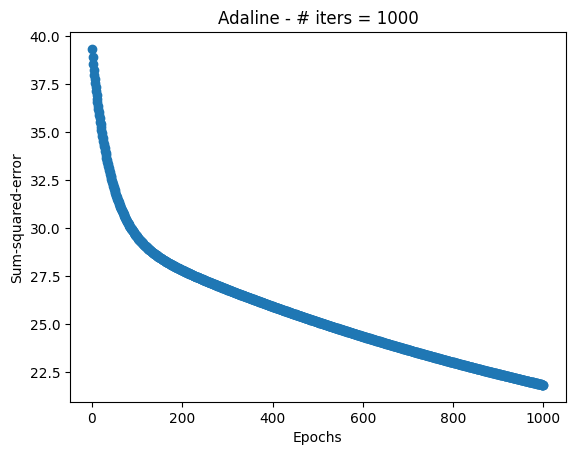

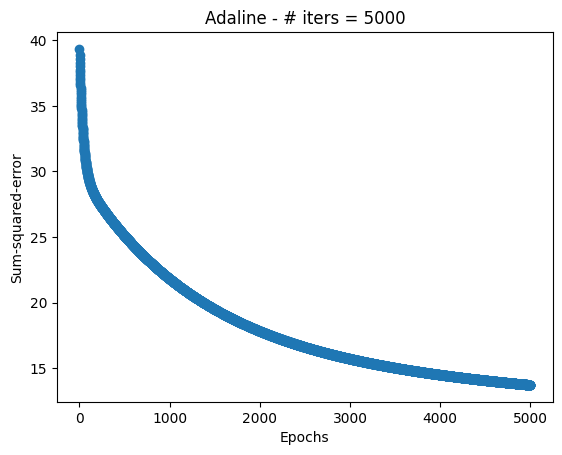

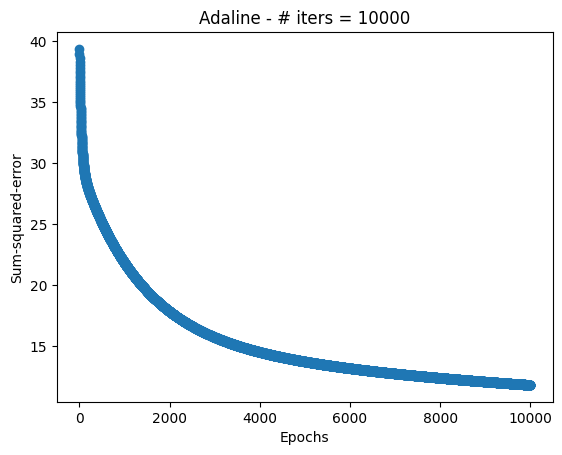

In [127]:
# find a good learning rate
learning_rates = [0.01, 0.001, 0.0001]
optimal_learning_rate(learning_rates, 50, X_std_train, y_std_train)

# find a good number of iterations
n_iter = [1000, 5000, 10000]
optimal_num_iters(n_iter, .0001, X_std_train, y_std_train)

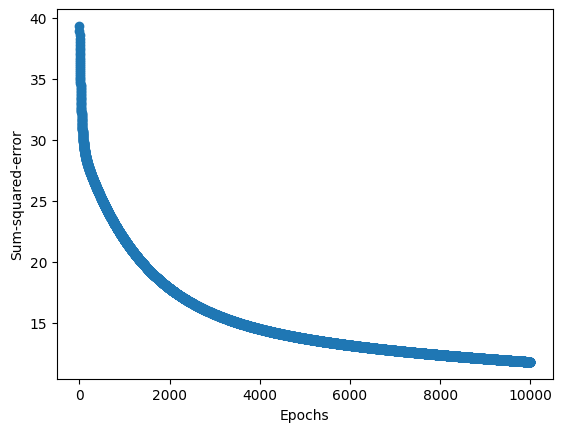

In [128]:
# create and train Adaline
ada6 = AdalineGD(n_iter=10000, eta=0.0001).fit(X_std_train, y_std_train)

# plot results
plot_ada_results(ada6)
# plot_decision_regions(X_std_train, y_train, ada2, 'Sepal Length', 'Petal Length')

# calculate accuracy of ada1 and add to dictionary
y_pred = ada6.predict(X_std_test)
accuracy(y_pred, y_std_test, "ada6", dict)

In [129]:
print(f"{'Model':<10} {'Score':<5}")
print("-" * 15)

for model, score in dict.items():
    print(f"{model:<10} {score:<5}")

Model      Score
---------------
ppn1       1.0  
ada1       1.0  
ppn2       1.0  
ada2       1.0  
ppn3       1.0  
ada3       1.0  
ppn4       0.65 
ada4       1.0  
ppn5       0.75 
ada5       0.95 
ppn6       0.95 
ada6       0.9  


# As you can see, the perceptron and adaline models both performed equally well (achieving 100% accuracy) when the features of the dataset were linearly seperable. However, once we started working with features that weren't linearly seperable, we see a disparity in the performance. Perceptrons perform unpredictably, with accuracy ranging from 50% to 90%. However, Adalines perform consistently well, with accuracy hovering around 90%.